# Lab 1 - Audrey Griffitts

## Imports

The following section imports and labels all the libraries we will use throughout the rest of the lab. Each import is labeled in the code comments for further clarity. 

In [ ]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

Using the greenhouse gas emission data set owid-co2-data.csv from Our World in Data, this lab will analyze the trends of CO$_2$ emissions and describe how the emission levels of the top 10 CO$_2$ emitters in 2020 have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

##### Solution $\rightarrow$ 1. Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

In order to import and set up the data, the Panda "pd.read_csv" command is used to allow Pandas to read in the data obtained from the repository link .

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

The code ran through, meaning that our data has been read by Pandas and labeled as "df"- which stands for data frame. This will make the data set easier to refer to for the rest of the lab. For further infomration, the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) can be consulted to see the description of each column.



##### Solution $\rightarrow$  2. Select the rows corresponding to individual countries

The `country` column of the data set contains some values that are groups of countries. In order to remove these observations from the data set, we first will start by labeling all groups of countries as "non-countries", so that we can refer to them in the next step. 

In [ ]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Now that the "non-countries" have been successfuly labeled, we combine the ".loc" and ".isin" function to index and group out the observations we do not want by setting them "False". 

In [ ]:
df = df.loc[df['country'].isin(non_countries) == False]

By redefining "df" successfully with this code, we have a new data frame that only refers to data for individual countries, which we can use for the rest of the data analysis.

## Explore the data set

##### Solution $\rightarrow$ 1. Display the head of the data frame

The "df.head" code allows us to see the first five terms of the head for the data frame "df" established in the last section of the lab. 

In [ ]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


The result of the code allows us to see the all the categories in the columns for the data set and the first five rows, organized alphabetically by country. This gives us a preview of the dataframe and a general insight to if we have imported it correctly. 

##### Solution $\rightarrow$ 2. Use the `info` method further explore the data.

The df.info command lets us look at the types of data columns present in our data set "df" as defined earlier. 

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

The result of this code gives us lots of information including data number, the amount of non-null data in each column, and the data type of each column. 

**1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?**
   
  No- all data types look correct. The country and iso-codes for countries are appropriately labeled as objects, the year column is represented by int64 (integers with no fractions), and all of the other numeric, fractional data are correctly categorized as float64.

 
**2.  Do any of the columns have missing (null) values?**

  Yes. According to the info function, there are many null values as the total number of entries is 39638, and the majority of the columns report less than that value in the in the "non-null count" section.

##### Solution $\rightarrow$ 3. What years are present in the data set?

The following code starts by defining a new data set "df_year", which only examins the years column from the entire "df" data set. We then can aggregate the minimum and maximum to find the range of the years in the data set. 

In [170]:
df_year = df[['year']]

df_year.min()
df_year.max()

df_year.agg(['min','max'])

,year
min,1750
max,2021



Using a combination of functions, we can find that oldest (minimum) year in the data set is 1750, and the newest (maximum) year is 2021. Therefore, the years present in the data set range from 1750 to 2021. 

## Analysis of top emissions in 2020

##### Solution $\rightarrow$ 1. Find the top 10 emitters of total CO$_2$ in 2020.

To find the top 10 emitters of total CO$_2$, we first define a new data frame that allows us to only look at the relevant information- in this case, year, country, and CO$_2$. Then, we can display the head of the data frame up to first 10 entries. By putting them in false ascending order, it orders them greatest to least by CO$_2$. 

In [171]:
df_co2 = df[['country', 'year', 'co2']]

df_co2[df_co2['year'] == 2020].sort_values(by = 'co2', ascending = False).head(10)

,country,year,co2
8989,China,2020,10956.213
44221,United States,2020,4715.691
20136,India,2020,2445.012
35053,Russia,2020,1624.221
21756,Japan,2020,1042.224
20552,Iran,2020,729.978
36664,Saudi Arabia,2020,661.193
16794,Germany,2020,639.381
20308,Indonesia,2020,609.786
39259,South Korea,2020,597.634


The result of the code shows a table of the data number, country, year, and carbon emissions of the top 10 carbon emitters in 20 from greatest the least. 

##### Solution $\rightarrow$ 2. Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

The following code is labeled with code comments for clarity. Using seaborn, we can create a histogram that refers to only the data from the data frame specified for year 2020 and other "plt" commands are used to label the graph as well as adjuts aesthetics for clarity. 

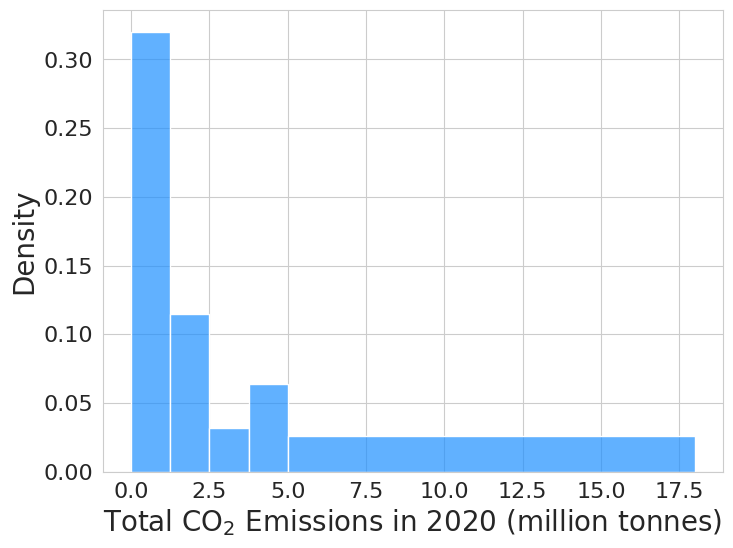

In [172]:
# Set the figure size
plt.figure(figsize = (8,6))

# Produce the histogram
sns.histplot(data = df[df['year'] == 2020], x = 'co2', 
             bins = np.r_[np.linspace(0, 5, 5), 18], color = 'dodgerblue', alpha = 0.7, stat = 'density')

# Label the axes
plt.ylabel('Density',fontsize = 20)
plt.xlabel('Total CO$_2$ Emissions in 2020 (million tonnes)',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The code produced a histogram on a density scale that represents the total CO$_2$ emissions in 2020 by fraction of density.

##### Solution $\rightarrow$ 3. Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

The following code is labeled with code comments for clarity. Using seaborn, we can create a boxplot that refers to only the data from the data frame specified for year 2020 and other "plt" commands are used to label the graph as well as adjuts aesthetics for clarity. 

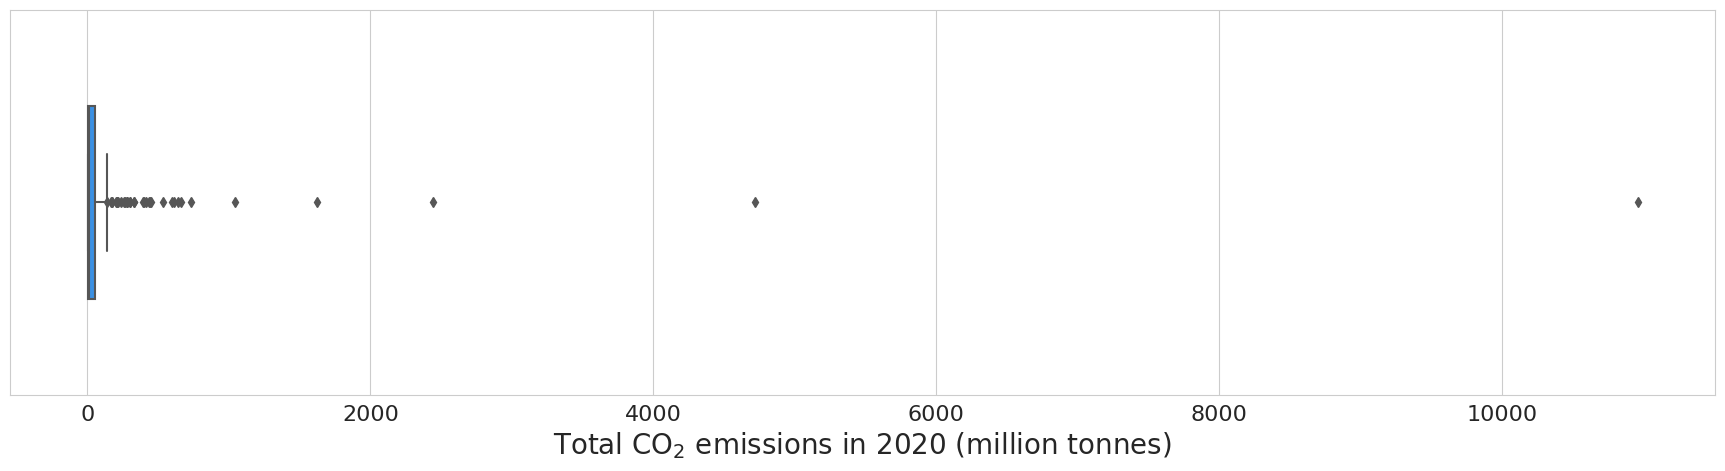

In [173]:
# Figure size
plt.figure(figsize = (22,5))

# Use Seaborn to make the boxplot
sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5)

# Label axes
plt.xlabel('Total CO$_2$ emissions in 2020 (million tonnes)',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The code produced a boxplot on that represents the distribution total CO$_2$ emissions in 2020. The majority of the points are shown in the blue rectangle, representing interquartile range, and there are extreme outliers depicted on the upper end as well.

##### Solution $\rightarrow$ 4. Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

Yes, it can clearly be shown from the box plot that the top 10 emitters in 2020 fall well above 1.5 times over the interquartile range, which is depicted by the blue rectangle on the graph from solution 3.

## Emission trend over time

##### Solution $\rightarrow$ 1. Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

In the following code, we define a new data frame called "df_year" that only includes data from the whole data frame if it is between years 1971 and 2020. We can use the info command to further explore the new data frame. 

In [174]:
df_year = df[df['year'].between(1971, 2020)]

df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11383 entries, 121 to 46521
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    11383 non-null  object 
 1   year                                       11383 non-null  int64  
 2   iso_code                                   11298 non-null  object 
 3   population                                 11217 non-null  float64
 4   gdp                                        7773 non-null   float64
 5   cement_co2                                 10452 non-null  float64
 6   cement_co2_per_capita                      10396 non-null  float64
 7   co2                                        10621 non-null  float64
 8   co2_growth_abs                             10531 non-null  float64
 9   co2_growth_prct                            10610 non-null  float64
 10  co2_including_luc   

The info command as shown allows us to see that there are 762 values missing from the CO$_2$ emissions from 1971 to 2020, as the total number of entries is 11,383 and the number of non-null entries for CO$_2$ is only 10,621. Thus, the difference tells us that there are 762 null values. 

##### Solution $\rightarrow$ 2. Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

In the following code, seaborn is used to create a lineplot of the "co2_top_10_emitters" set of data, which has been defined as the data only the countries listed as top 10 emitters in 2020. "plt" commands are used to label and refine aesthetics of the graph. 

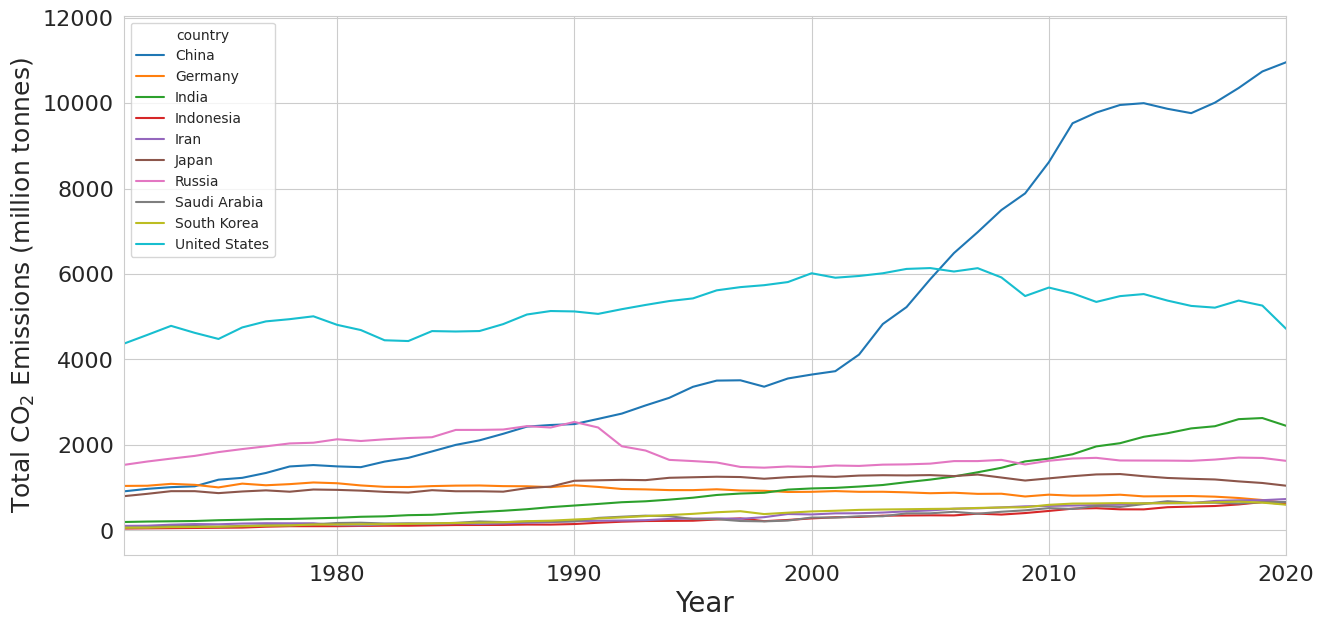

In [177]:
co2_top_10_emitters = df[df['country'].isin(['China','United States','India','Russia','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])]

plt.figure(figsize=(15,7))
sns.lineplot(data=co2_top_10_emitters, x='year', y='co2', hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total CO$_2$ Emissions (million tonnes)', fontsize = 18)
plt.xlim(1971,2020)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The output of the code gives a color coded line plot assigning each of the top 10 carbon emitters in 2020 a color, charting their trends from over the last 50 years (1971-2020). 

##### Solution $\rightarrow$ 3. Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

The following code is the same as the code from solution 2; however, there is the addition of defining a "mean_co2_all" set, which illustrates the mean carbon emissions from all countries in the data set. To add this mean into our previous plot, we use the "plt.plot" function and make sure to label and color it to appear noticeable among the rest of the graph. 

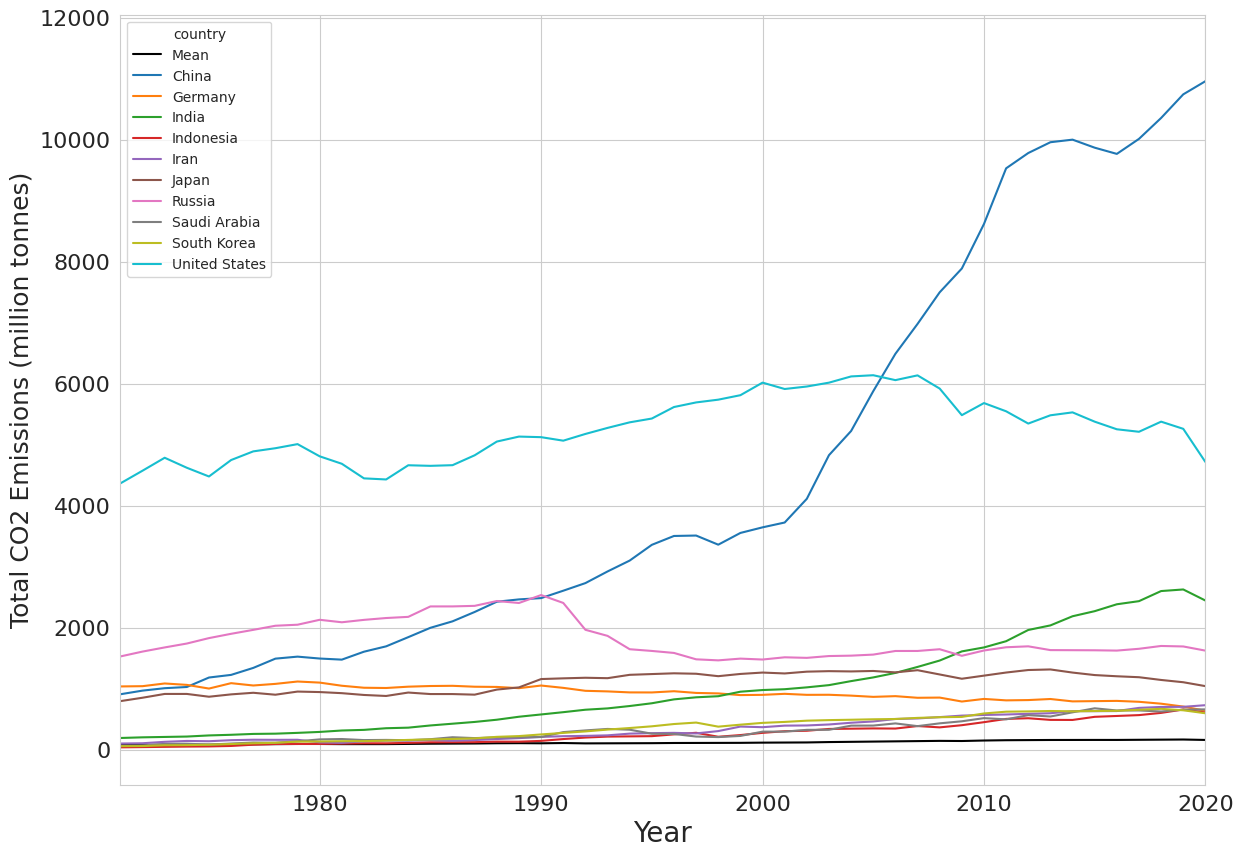

In [ ]:
mean_co2_all = df.groupby('year')['co2'].mean()

plt.figure(figsize=(14,10))

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize = 18)
plt.xlim(1971,2020)
plt.plot(mean_co2_all.index, mean_co2_all, label='Mean', color='black')
sns.lineplot(data=co2_top_10_emitters, x='year', y='co2', hue='country')

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

##### Solution $\rightarrow$ 4. Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

The following code is the same as the code used to establish the graph in solution 3 except an added section for plotting on a log scale is created in order to help re-scale the graph to take a better look at non-outlier lines. Using plt.yscale function, we adjust the y-scale to be in terms of log.

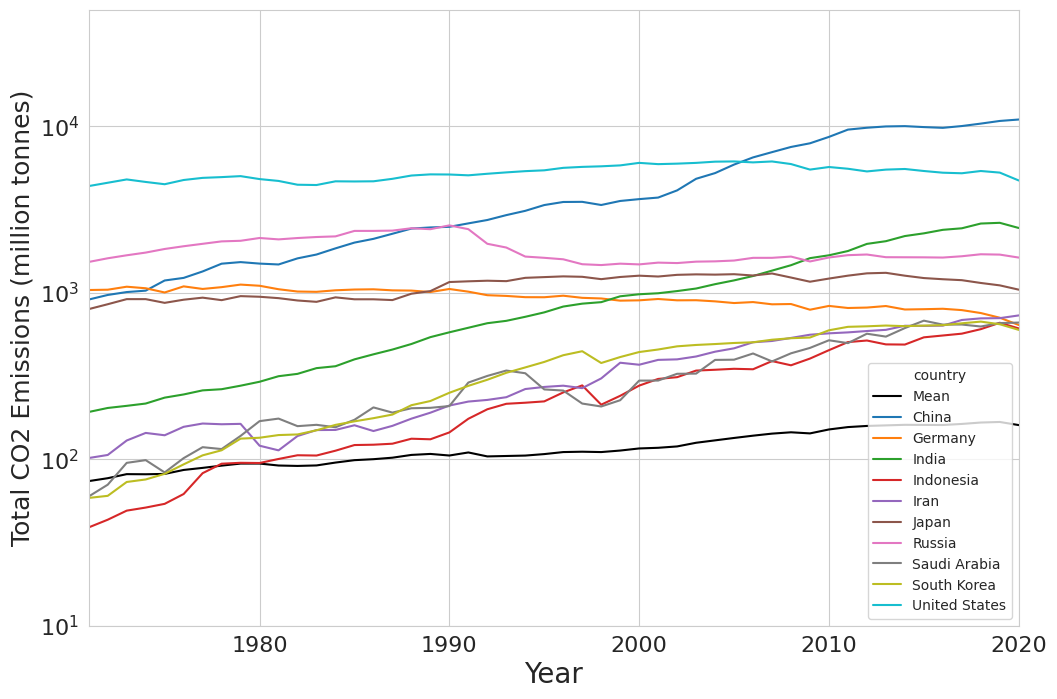

In [179]:
plt.figure(figsize=(12,8))

plt.plot(mean_co2_all.index, mean_co2_all, label='Mean', color='black')
sns.lineplot(data=co2_top_10_emitters, x='year', y='co2', hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize = 18)
plt.xlim(1971,2020)

# Plotting results on log scale
plt.yscale('log')
plt.ylim(10,50000)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The code allows us to produce a clear graph of the total CO$_2$ emissions over years 1971-2020 that preserves the integrity of the data but allows us to look at all of the separate lines more clearly. 

##### Solution $\rightarrow$ 5. Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

The trend in CO$_2$ for these countries in the last 50 years show that the top 10 emitters in 2020 have been consistently higher than the rest of the countries in the world since 1971 and continue to grow exponentially further above all the other countries. 